### 01 Loading Datasets

In [1]:
import geopandas as gpd

In [2]:
fields = gpd.read_file("../Data/brpgewaspercelen_definitief_2020_small.gpkg")

<Axes: >

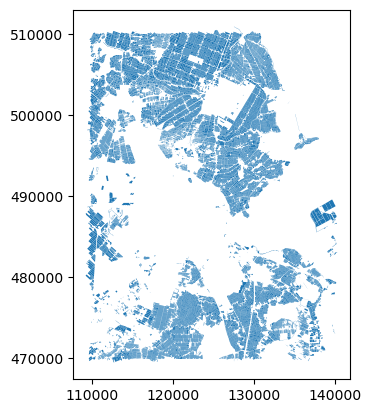

In [3]:
fields.plot()

In [4]:
fields.head(5)

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117744.449 504313.788, 117746.064 50..."
2,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117784.216 503525.695, 117789.021 50..."
3,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117903.681 504159.929, 117908.257 50..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118150.139 505369.637, 118168.010 50..."


In [10]:
fields.columns

Index(['category', 'gewas', 'gewascode', 'jaar', 'status', 'geometry'], dtype='object')

### 02 Filtering Data

In [11]:
fields["gewas"]

0                                  Grasland, blijvend
1                                  Grasland, blijvend
2        Grasland, natuurlijk. Hoofdfunctie landbouw.
3        Grasland, natuurlijk. Hoofdfunctie landbouw.
4                                  Grasland, blijvend
                             ...                     
22026                              Grasland, blijvend
22027                              Grasland, blijvend
22028                              Grasland, blijvend
22029                                     Maïs, snij-
22030                              Grasland, blijvend
Name: gewas, Length: 22031, dtype: object

In [17]:
fields[fields.category == "Grasland"].head()

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117744.449 504313.788, 117746.064 50..."
2,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117784.216 503525.695, 117789.021 50..."
3,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117903.681 504159.929, 117908.257 50..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118150.139 505369.637, 118168.010 50..."


In [20]:
fields[fields.gewascode == 331].head()

,category,gewas,gewascode,jaar,status,geometry
2,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117784.216 503525.695, 117789.021 50..."
3,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117903.681 504159.929, 117908.257 50..."
5,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((118185.000 502858.240, 118178.121 50..."
6,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((118227.653 502771.581, 118232.369 50..."
7,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((118361.594 504112.593, 118357.381 50..."


*describe* only works on *Numeric* Columns

In [21]:
fields.describe()

,gewascode,jaar
count,22031.000000,22031.0
mean,315.642231,2020.0
std,287.193184,0.0
min,174.000000,2020.0
25%,265.000000,2020.0
50%,265.000000,2020.0
75%,265.000000,2020.0
max,6522.000000,2020.0


In [36]:
fields.crs                        ## Gives the Coordinate System of the Geodataframe

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [37]:
fields.total_bounds                        ## Gives the coordinates of the Geodataframe

array([109222.03325 , 469461.512625, 140295.122125, 510939.997875])

#### For Reading a number of Rows from the file
*Can be handy to understand the data structure*

In [31]:
fields_1row = gpd.read_file("../Data/brpgewaspercelen_definitief_2020_small.gpkg", rows=30)

In [32]:
fields_1row.shape,    fields.shape

((30, 6), (22031, 6))

#### Masking the Dataframe through a Bounding Box

In [40]:
# Defining a bounding box
xmin, xmax = (120000, 130000)
ymin, ymax = (490000, 500000)
bbox = (xmin, ymin, xmax, ymax)
bbox

(120000, 490000, 130000, 500000)

The bbox masked datasets shape:  (3483, 6)
The whole datasets shape:  (22031, 6)


<Axes: >

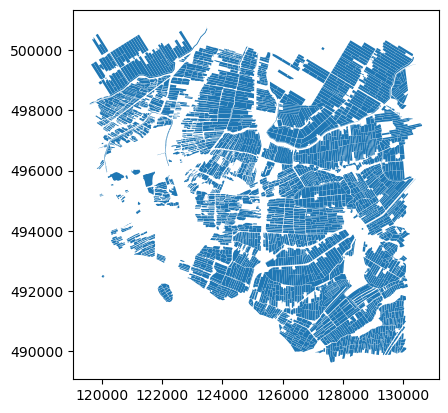

In [51]:
field_bbox = gpd.read_file("../Data/brpgewaspercelen_definitief_2020_small.gpkg", bbox=bbox)
print("The bbox masked datasets shape: ", field_bbox.shape), print("The whole datasets shape: ", fields.shape)
field_bbox.plot()

In [52]:
field_bbox.total_bounds

array([119594.384   , 489628.737125, 130638.544125, 500782.531   ])

Online tool for geojson file development from bouding box: https://geojson.io/#map=11.17/52.2105/6.8746

In [53]:
import fiona

In [54]:
with fiona.open("../Data/brpgewaspercelen_definitief_2020_small.gpkg") as f:
    bounds = f.bounds
    crs = f.crs

In [63]:
print(bounds)

(109222.03325, 469461.512625001, 140295.122125, 510939.997875001)


In [59]:
crs

CRS.from_wkt('PROJCS["Amersfoort / RD New",GEOGCS["Amersfoort",DATUM["Amersfoort",SPHEROID["Bessel 1841",6377397.155,299.1528128]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4289"]],PROJECTION["Oblique_Stereographic"],PARAMETER["latitude_of_origin",52.1561605555556],PARAMETER["central_meridian",5.38763888888889],PARAMETER["scale_factor",0.9999079],PARAMETER["false_easting",155000],PARAMETER["false_northing",463000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","28992"]]')

### In order to get the package version, execute the below command

In [67]:
pip show fiona

Name: fiona
Version: 1.9.5
Summary: Fiona reads and writes spatial data files
Home-page: 
Author: Sean Gillies
Author-email: 
License: BSD 3-Clause
Location: C:\Users\tjmah\AppData\Roaming\Python\Python311\site-packages
Requires: attrs, certifi, click, click-plugins, cligj, setuptools, six
Required-by: geopandas
Note: you may need to restart the kernel to use updated packages.


In [68]:
pip show geopandas

Name: geopandas
Version: 0.14.0
Summary: Geographic pandas extensions
Home-page: 
Author: 
Author-email: Kelsey Jordahl <kjordahl@alum.mit.edu>
License: BSD 3-Clause
Location: C:\Users\tjmah\AppData\Roaming\Python\Python311\site-packages
Requires: fiona, packaging, pandas, pyproj, shapely
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [70]:
pip show pyproj

Name: pyproj
Version: 3.6.1
Summary: Python interface to PROJ (cartographic projections and coordinate transformations library)
Home-page: https://github.com/pyproj4/pyproj
Author: 
Author-email: Jeff Whitaker <jeffrey.s.whitaker@noaa.gov>
License: MIT
Location: C:\Users\tjmah\AppData\Roaming\Python\Python311\site-packages
Requires: certifi
Required-by: geopandas, rioxarray
Note: you may need to restart the kernel to use updated packages.


### 03 Spatial Queries

In [71]:
xmin, xmax = (120000, 135000)
ymin, ymax = (485000, 500000)

In [72]:
field_cx = fields.cx[xmin:xmax, ymin:ymax]

The field_cx masked datasets shape:  (4872, 6)
The whole datasets shape:  (22031, 6)


<Axes: >

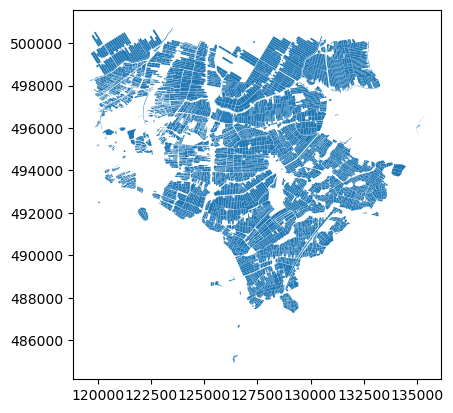

In [74]:
print("The field_cx masked datasets shape: ", field_cx.shape), print("The whole datasets shape: ", fields.shape)
field_cx.plot()

#### 04 Exporting Files

In [79]:
field_cx.to_file("../Data/fields_cropped.shp")     ## As shapefile

In [80]:
field_cx.to_file("../Data/fields_cropped.gpkg")     ## As Geopackage

#### 05 Reading Data from zip files

In [81]:
wells = gpd.read_file("../Data/brogmwvolledigeset.zip")

<Axes: >

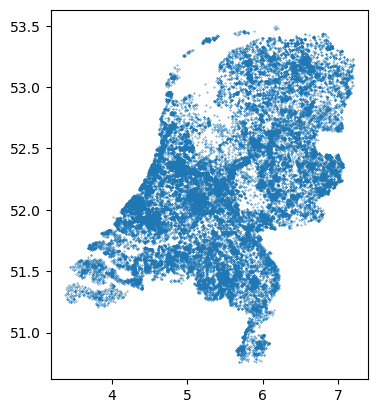

In [82]:
wells.plot(markersize=0.1)                 ## Reducing the marker size for visualization. Default value might result clutterness

#### 06 Vector Operations (Clipping)

In [83]:
wells_clip = wells.clip(field_cx)

C:\Users\tjmah\AppData\Roaming\Python\Python311\site-packages\geopandas\geodataframe.py:2379: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["ETRS89",DATUM["European_Terrestrial_Refere ...
Right CRS: EPSG:28992

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type)


In [85]:
wells.crs, field_cx.crs             ## in order to make sure they are in same CRS

(<Geographic 2D CRS: GEOGCS["ETRS89",DATUM["European_Terrestrial_Refere ...>
 Name: ETRS89
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (degree)
 - lat[north]: Latitude (degree)
 Area of Use:
 - undefined
 Datum: European Terrestrial Reference System 1989
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:28992>
 Name: Amersfoort / RD New
 Axis Info [cartesian]:
 - [east]: Easting (metre)
 - [north]: Northing (metre)
 Area of Use:
 - undefined
 Coordinate Operation:
 - name: unnamed
 - method: Oblique Stereographic
 Datum: Amersfoort
 - Ellipsoid: Bessel 1841
 - Prime Meridian: Greenwich)

In [87]:
wells = wells.to_crs(field_cx.crs)                    ##Transformation of the CRS
wells.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [88]:
wells_clip = wells.clip(field_cx)

<Axes: >

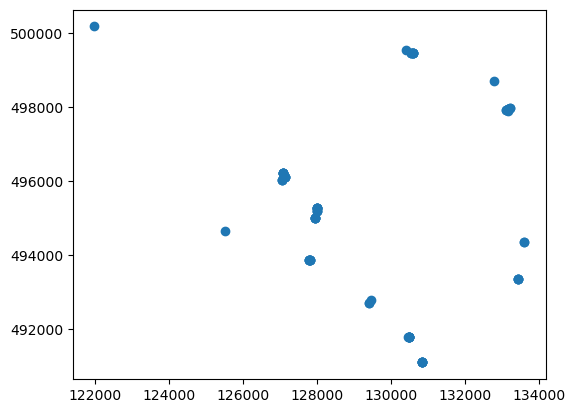

In [89]:
wells_clip.plot()

### 07 Plotting two Dataframes together

<Axes: >

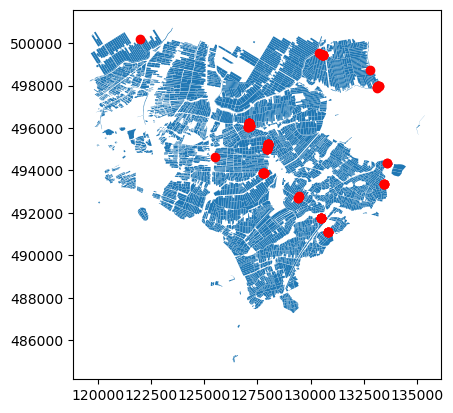

In [91]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots()
field_cx.plot(ax=ax)
wells_clip.plot(ax=ax,color="r")

#### 08 Creating a Buffer

<Axes: >

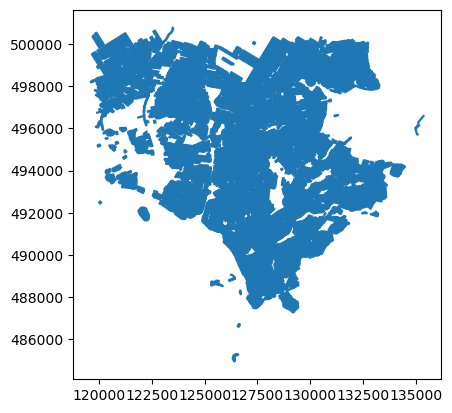

In [92]:
buffer = field_cx.buffer(50)
buffer.plot()

<Axes: >

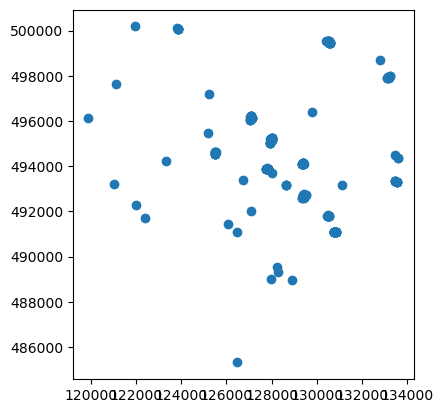

In [93]:
wells_clip_buffer = wells.clip(buffer)
wells_clip_buffer.plot()

<Axes: >

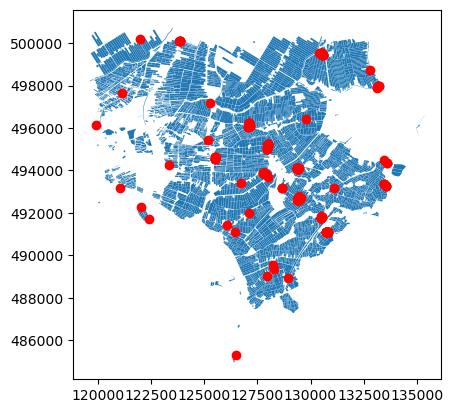

In [94]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots()
field_cx.plot(ax=ax)
wells_clip_buffer.plot(ax=ax,color="r")

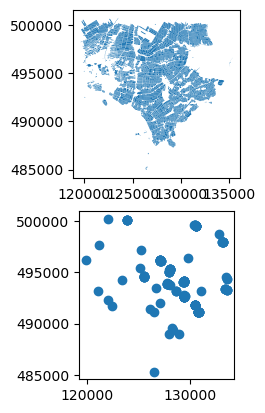

In [104]:
fig, axes = plt.subplots(2,1)             ## 2 Rows, 1 Column
for ax, geom in zip(axes, [field_cx, wells_clip_buffer]):
    geom.plot(ax=ax)

As *buffer* does not have the attributes, we need to impose those in its attribute table  

In [119]:
buffer.shape

(4872,)

In [111]:
field_cx.shape

(4872, 6)

In [120]:
fields_buffer = field_cx.copy()

<Axes: >

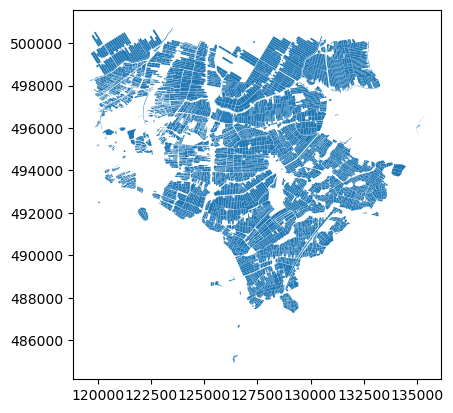

In [121]:
fields_buffer.plot()

<Axes: >

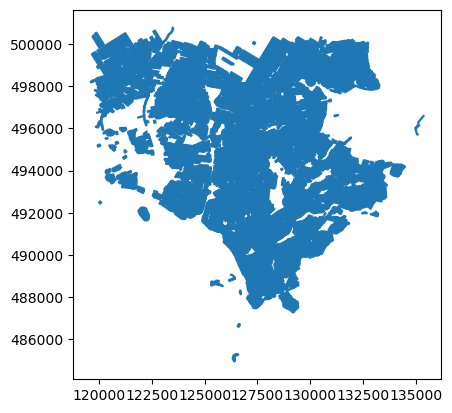

In [122]:
fields_buffer["geometry"] = buffer
fields_buffer.plot()

*For faster operation, dissolving the buffer files can be a good practice*

In [123]:
fields_buffer_dissolve = fields_buffer.dissolve()
fields_buffer_dissolve

,geometry,category,gewas,gewascode,jaar,status
0,"MULTIPOLYGON (((120037.937 492388.957, 120033....",Grasland,"Grasland, blijvend",265,2020,Definitief


<Axes: >

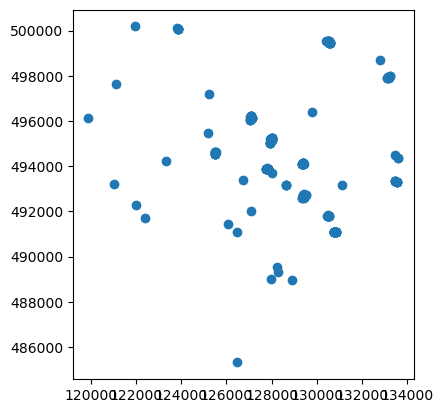

In [124]:
wells_clip_buffer_dissolve = wells.clip(fields_buffer_dissolve)
wells_clip_buffer_dissolve.plot()